<a href="https://colab.research.google.com/github/Samarth-991/ML-Projects/blob/master/12_ML_Tensor_flow_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training using Teapot on Cancer Dataset
Explore the Breast Cancer dataset and develop a model to try classifying suspected cells to Benign or Malignant

1. The Data - Exploratory Data Analysis
2. The Variables - Feature Selection
3. The Model - Building a Logistic Regression Model
4. The Prediction - Making Predictions with the Model


In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
dataset_dir = '/content/'
datasetfile = 'data.csv'
dataset = os.path.join(dataset_dir,datasetfile)
print (dataset)

/content/data.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## DATA 
Predicting Breast Cancer - Logistic Regression
Mike M. Lee
10th Oct 2017
0. Introduction
Hello Kagglers!

Welcome to my first kernel on Kaggle. In this notebook, I explore the Breast Cancer dataset and develop a Logistic Regression model to try classifying suspected cells to Benign or Malignant. This notebook was inspired by Mehgan Risdal's kernel on the Titanic data, and Pedro Marcelino's kernel on the Housing Prices data.

The contents of this notebook will follow the outline below:

The Data - Exploratory Data Analysis
The Variables - Feature Selection
The Model - Building a Logistic Regression Model
The Prediction - Making Predictions with the Model
Throughout the notebook, I will try to aid your understanding with some visualizations where necessary. I hope you enjoy reading through this notebook, and please leave comments below if you have any questions or feedbacks. I am a total beginner to the field of Data Science, so any feedback is welcome since it helps me realize my mistakes and also allows me to pick up new insights.

Let's dive right into the data now!

1. The Data
Extracted from the UCI ML repository

Attribute Information:
id
diagnosis: M = malignant, B = benign
Columns 3 to 32

Ten real-valued features are computed for each cell nucleus:

radius: distances from center to points on the perimeter
texture: standard deviation of gray-scale values
perimeter
area
smoothness: local variation in radius lengths
compactness: perimeter^2 / area - 1.0
concavity: severity of concave portions of the contour
concave points: number of concave portions of the contour
symmetry
fractal dimension: "coastline approximation" - 1
The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [2]:
dataframe = pd.read_csv(dataset)
print (dataframe.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [3]:
dataframe['diagnosis'] = dataframe['diagnosis'].str.upper()
dataframe['diagnosis'] = dataframe['diagnosis'].map(dict (M=1,B=0))

In [4]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# count number of obvs in each class
benign, malignant = dataframe['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(dataframe) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(dataframe) * 100, 2), '%')

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


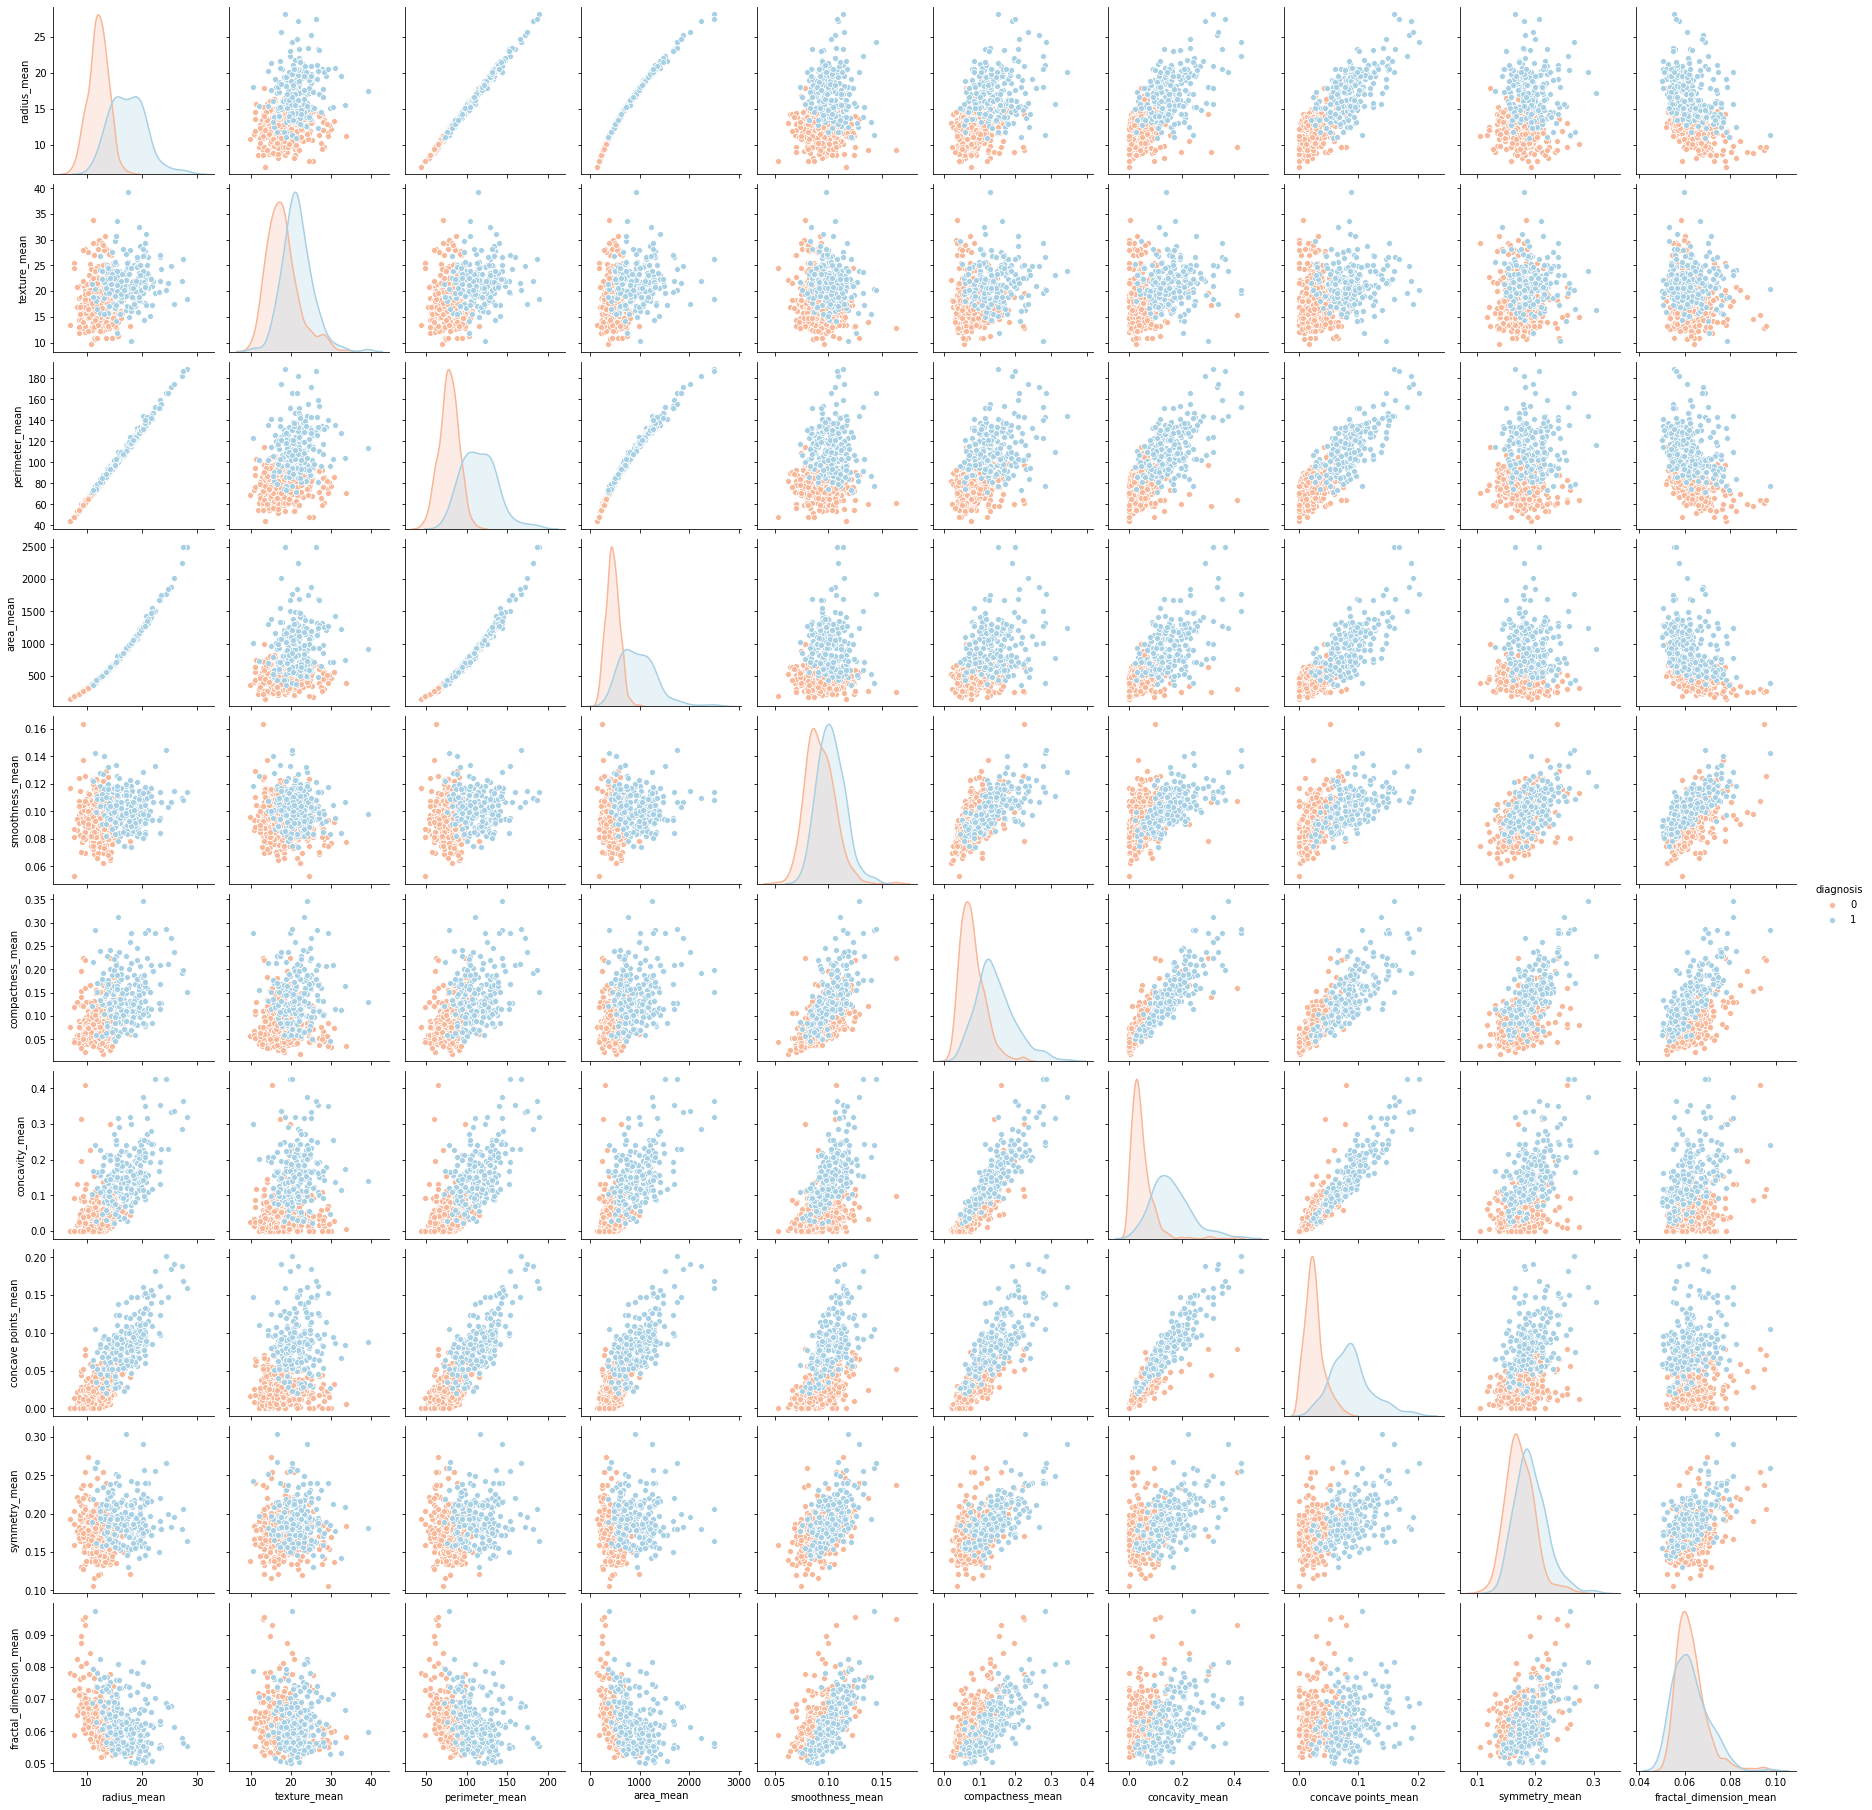

In [6]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=dataframe[cols], hue='diagnosis', palette='RdBu')

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

In the coming up section, we will generate a matrix similar to the one above, but this time displaying the correlations between the variables instead of a scatter plot. Let's find out if our hypothesis about the multicollinearity has any statistical support.

## Variables 
Let us draw the co-realtion matrix to understand the co-relation among the variables 

In [7]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


No. of features 32
Data points 569


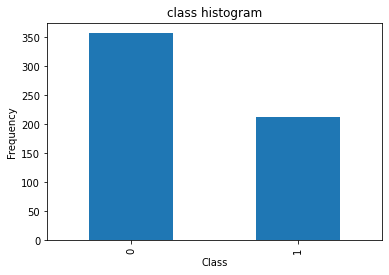

In [8]:
pd.value_counts(dataframe['diagnosis']).plot.bar()
plt.title('class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
print ("No. of features {}".format(dataframe.shape[1]))
print ("Data points {}".format(dataframe.shape[0]))

In [9]:
print ("IS NULL in dataset")
print (dataframe.isnull().sum())
print ("\nIS NA in dataset")
print (dataframe.isna().sum())

IS NULL in dataset
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

IS NA in dataset
id                    

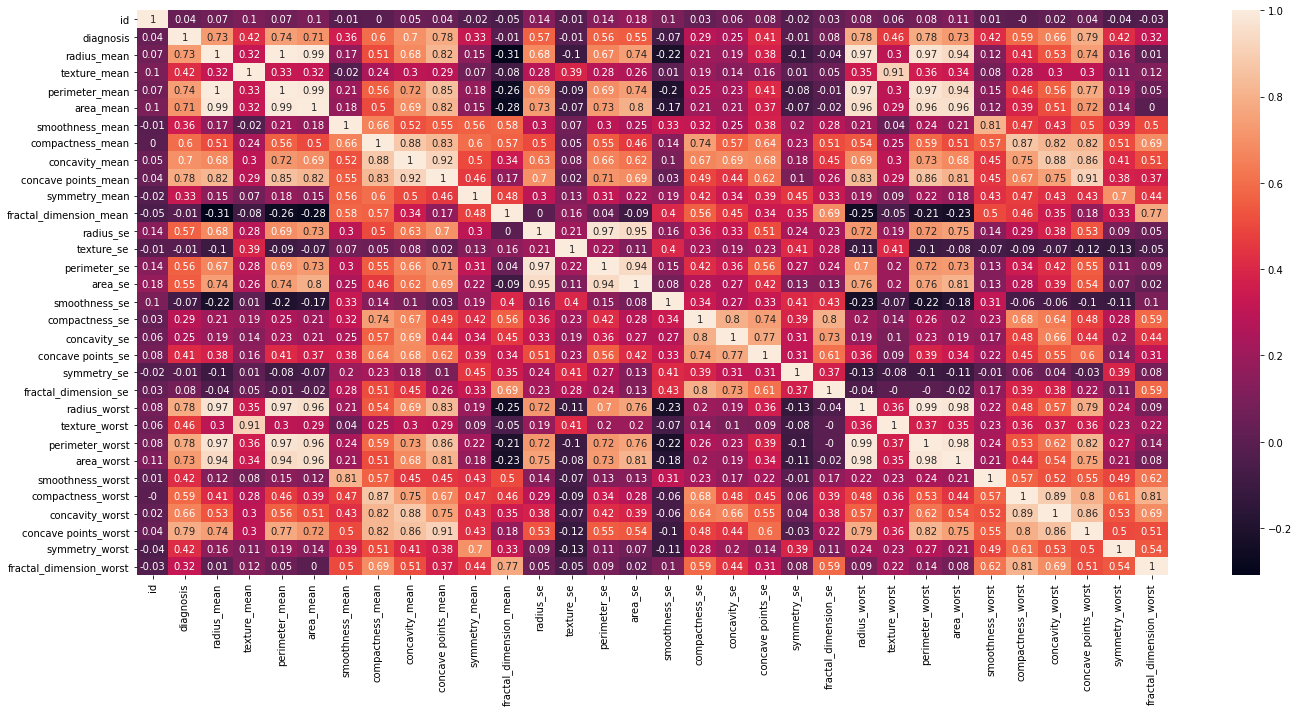

In [10]:
# Defining the co-relation matrix 
plt.figure(figsize = (20,10))        # Size of the figure

corr = dataframe.corr().round(2)
# # Mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap
# sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


sns.heatmap(corr,annot = True)
plt.tight_layout()
plt.show()

In [11]:
# Auto detect high co-related variables 
# Create correlation matrix
corr_matrix = dataframe.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print (to_drop)

# Mostly all worst columns can be droped 
left_worst_columns = ['symmetry_worst','concave points_se']
to_drop = to_drop+left_worst_columns
to_drop

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'fractal_dimension_worst',
 'symmetry_worst',
 'concave points_se']

In [12]:
cancer_dataset = dataframe.drop(to_drop,axis=1)
cancer_dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se
0,842302,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003
1,842517,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389
2,84300903,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250
3,84348301,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756
5,843786,1,12.45,15.70,0.12780,0.17000,0.2087,0.07613,0.3345,0.8902,0.007510,0.03345,0.02165
6,844359,1,18.25,19.98,0.09463,0.10900,0.1794,0.05742,0.4467,0.7732,0.004314,0.01382,0.01369
7,84458202,1,13.71,20.83,0.11890,0.16450,0.2196,0.07451,0.5835,1.3770,0.008805,0.03029,0.01486
8,844981,1,13.00,21.82,0.12730,0.19320,0.2350,0.07389,0.3063,1.0020,0.005731,0.03502,0.02143
9,84501001,1,12.46,24.04,0.11860,0.23960,0.2030,0.08243,0.2976,1.5990,0.007149,0.07217,0.01789


columns to drop 0


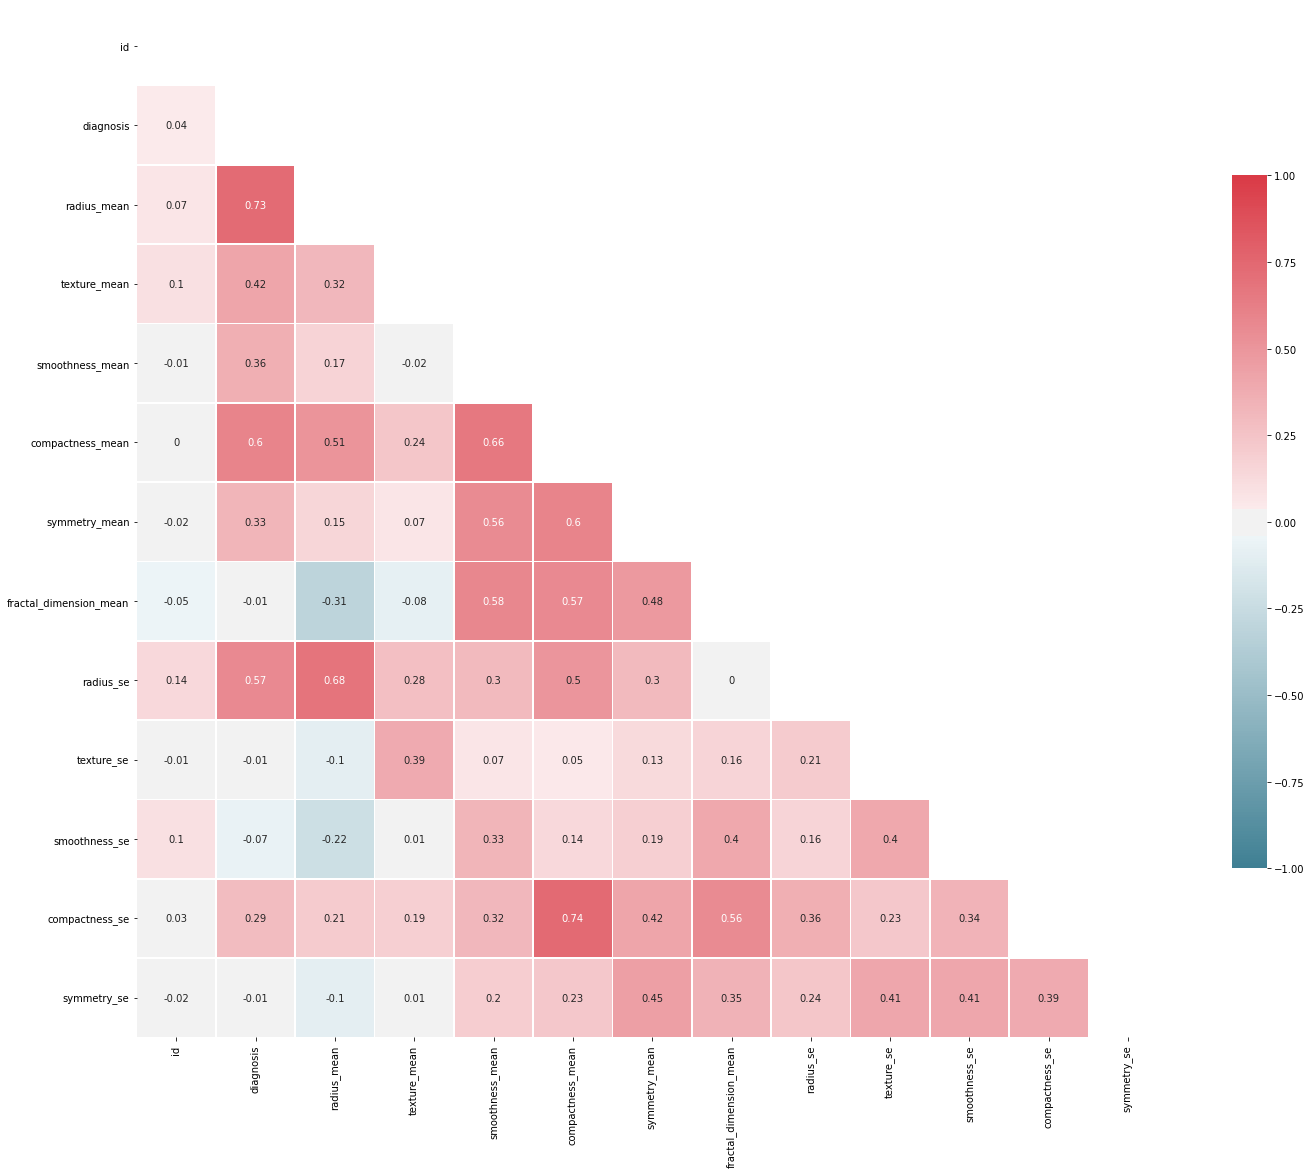

In [13]:
corr = cancer_dataset.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

upper = corr.where(np.triu(np.ones(corr.shape),
                                      k=1).astype(np.bool))

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print ("columns to drop",len(to_drop)) 

In [14]:
X= cancer_dataset.drop(['diagnosis','id'],axis=1)
X.head()


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756


In [15]:
Y=cancer_dataset.diagnosis
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Using Conventional Train and Test split

In [16]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=47)
print ("Trainnig data",X_train.shape)
print ("Train label",y_train.shape)
print ("Test data",X_test.shape)
print ("Test Label",y_test.shape)

Trainnig data (398, 11)
Train label (398,)
Test data (171, 11)
Test Label (171,)


# Using TPOT Classifier



```
# This is formatted as code
```



In [18]:
!pip install tpot
from tpot import TPOTClassifier

     |████████████████████████████████| 92kB 696kB/s 
     |████████████████████████████████| 163kB 1.4MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=3f682411c14b5acbd0d2fdc7f3f2ae866654476eac11d3b042ba4f5f2ef60ada
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [19]:
# tpot = TPOTClassifier(generations=7,verbosity=2,cv=5,random_state=42)
# tpot.fit(X_train,y_train)

In [20]:
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_exported_pipeline.py')

### Pipeline code in sklearn  : 


In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy

In [22]:
# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
tpot_data = cancer_dataset
features = tpot_data.drop(['diagnosis','id'], axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['diagnosis'].values, random_state=42)

# Average CV score on the training set was: 0.9372151898734176
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=7, max_features=1.0, min_samples_leaf=3, min_samples_split=8, n_estimators=100, subsample=0.7000000000000001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
#results = exported_pipeline.predict(testing_features)
results = exported_pipeline.predict(testing_features)


In [23]:
print (exported_pipeline.score(testing_features,testing_target))

0.965034965034965


ROC-AUC Score= 0.96
Accuracy score= 0.97
Confusion Matrix 
[[87  2]
 [ 3 51]]
TP 51
TN 87
FP 2
FN 3
Recall= 0.9444444444444444
Precison= 0.9622641509433962
specificity= 0.9775280898876404


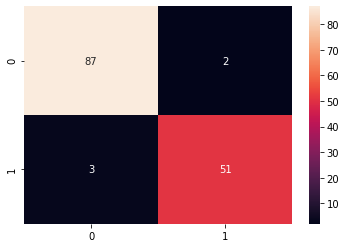

In [24]:
# MOdel Accuracy stats

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score,auc

rfc_pred = pd.DataFrame({'Target_status':testing_target,'inference':results})
# Let's check the report of our default model
print ("ROC-AUC Score= {:2.2}".format(roc_auc_score(rfc_pred.Target_status, rfc_pred.inference)))
print ("Accuracy score= {:2.2}".format(accuracy_score(rfc_pred.Target_status, rfc_pred.inference)))
confusion = confusion_matrix(rfc_pred.Target_status,rfc_pred.inference)
print ("Confusion Matrix \n{}".format(confusion))
sns.heatmap(confusion,annot=True)


TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
print("TP",TP) 
print("TN",TN) 
print("FP",FP) 
print("FN",FN)
print ("Recall= {}".format(TP/float(TP+FN)))
print ("Precison= {}".format(TP/float(TP+FP)))
print ("specificity= {}".format(TN / float(TN+FP)))

False positive rate =  0.02247191011235955
True positive rate =  0.9444444444444444


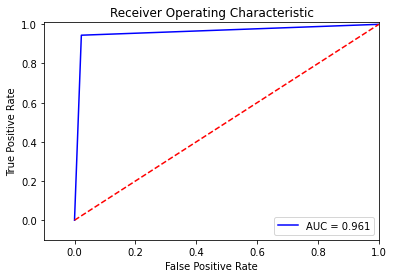

In [25]:
# draw_roc(y_pred_final.churn, y_pred_final.Predicted)
fpr, tpr, thresholds = roc_curve(rfc_pred.Target_status, rfc_pred.inference)
print("False positive rate = ",fpr[1])
print("True positive rate = ",tpr[1])
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(exported_pipeline, filename)

['finalized_model.sav']

In [27]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Dropout

In [28]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(398, 11)
(171, 11)


In [29]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=11))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
13/13 [==============================] - 0s 18ms/step - loss: 0.5740 - accuracy: 0.7513 - val_loss: 0.4254 - val_accuracy: 0.8655
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3792 - accuracy: 0.8693 - val_loss: 0.2739 - val_accuracy: 0.9181
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2880 - accuracy: 0.8970 - val_loss: 0.1910 - val_accuracy: 0.9415
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.9146 - val_loss: 0.1533 - val_accuracy: 0.9532
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.9171 - val_loss: 0.1372 - val_accuracy: 0.9532
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1788 - accuracy: 0.9372 - val_loss: 0.1298 - val_accuracy: 0.9357
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1583 - accuracy: 0.9397 - val_loss: 0.1234 - val_accuracy: 0.9474
Epoch 8/10
13/13 [=

In [31]:
tf.saved_model.save(model,export_dir='breast_cancer_model/1',signatures=None)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: breast_cancer_model/1/assets


In [32]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = list(map(lambda x : 1 if x > 0.5 else 0,y_pred))

ROC-AUC Score= 0.92
Accuracy score= 0.93


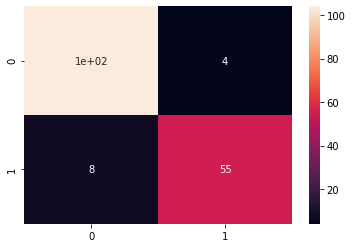

In [34]:
from sklearn.metrics import confusion_matrix

# Let's check the report of our default model
print ("ROC-AUC Score= {:2.2}".format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print ("Accuracy score= {:2.2}".format(accuracy_score(y_true=y_test,y_pred=y_pred)))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

Tensor Flow Random Boosted trees 

In [46]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se
0,842302,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003
1,842517,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389
2,84300903,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250
3,84348301,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756


In [56]:
import tensorflow as tf 
from IPython.display import clear_output
tf.random.set_seed(123)
numeric_cols = cancer_dataset.select_dtypes(include=np.number).columns.tolist()


In [57]:
X = cancer_dataset.drop(['id','diagnosis'],axis=1)
Y = cancer_dataset['diagnosis']
print (X.shape)
print(Y.shape)

(569, 11)
(569,)


In [58]:
feature_columns = list()
fc = tf.feature_column

for numeric_cols in cols:
  feature_columns.append(fc.numeric_column(numeric_cols,dtype=tf.float32))
feature_columns

[NumericColumn(key='radius_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='texture_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='smoothness_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='compactness_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='symmetry_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fractal_dimension_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='radius_se', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='texture_se', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='smoothness_se', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='compactness_s

In [59]:
# Use entire batch since this is such a small dataset.

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=tf.random.set_seed(123))
print ("Trainnig data",x_train.shape)
print ("Train label",y_train.shape)
print ("Test data",x_test.shape)
print ("Test Label",y_test.shape)

Trainnig data (398, 11)
Train label (398,)
Test data (171, 11)
Test Label (171,)


## Build the input pipeline
Create the input functions using the from_tensor_slices method in the tf.data API to read in data directly from Pandas.

In [60]:
NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = (dataset
      .repeat(n_epochs)
      .batch(NUM_EXAMPLES))
    return dataset
  return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(x_train, y_train)
eval_input_fn = make_input_fn(x_test, y_test, shuffle=False, n_epochs=1)

## Model Training

In [62]:
params = {
  'n_trees': 100,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, **params)
# Train model.
est.train(train_input_fn, max_steps=100)

# Evaluation.
results = est.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

,0
accuracy,0.935673
accuracy_baseline,0.666667
auc,0.985149
auc_precision_recall,0.972382
average_loss,0.164795
label/mean,0.333333
loss,0.164795
precision,0.960000
prediction/mean,0.304754
recall,0.842105


## Model Interpretibility 

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns_colors = sns.color_palette('colorblind')

In [64]:
pred_dicts = list(est.experimental_predict_with_explanations(eval_input_fn))

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp28_wutx5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tm

## DFCs
output the directional feature contributions (DFCs) to explain individual predictions using the approach outlined in Palczewska et al and by Saabas in Interpreting Random Forests

In [67]:
# Create DFC Pandas dataframe.
labels = y_test.values
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
df_dfc = pd.DataFrame([pred['dfc'] for pred in pred_dicts])
df_dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness_mean,171.0,-0.060707,0.090843,-0.193446,-0.122930,-0.116506,0.025090,0.252932
radius_se,171.0,-0.038665,0.086793,-0.173760,-0.098501,-0.089883,0.038996,0.203079
radius_mean,171.0,-0.025046,0.152731,-0.267243,-0.121734,-0.110966,0.170354,0.412114
symmetry_se,171.0,-0.020178,0.030576,-0.100551,-0.038206,-0.016457,-0.000769,0.094463
smoothness_se,171.0,0.001139,0.015380,-0.060718,-0.000689,0.000000,0.000000,0.088584
smoothness_mean,171.0,0.042097,0.090367,-0.334475,-0.012285,0.002020,0.118902,0.205403
symmetry_mean,171.0,0.005235,0.019209,-0.092652,-0.002175,0.000471,0.009896,0.076564
texture_mean,171.0,0.005770,0.091816,-0.367959,-0.021464,-0.007125,0.056785,0.185013
texture_se,171.0,-0.000175,0.006893,-0.033278,-0.001173,-0.000043,0.000727,0.033165
compactness_se,171.0,0.006086,0.022270,-0.079989,0.000000,0.000000,0.004050,0.159735


In [76]:
# Sum of DFCs + bias == probabality.
bias = pred_dicts[0]['bias']
dfc_prob = df_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_prob.values,
                               probs.values)


# Boilerplate code for plotting :)
def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example):
  TOP_N = 8 # View top 8 features.
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(x_test.iloc[ID][sorted_ix], ax)
  return ax

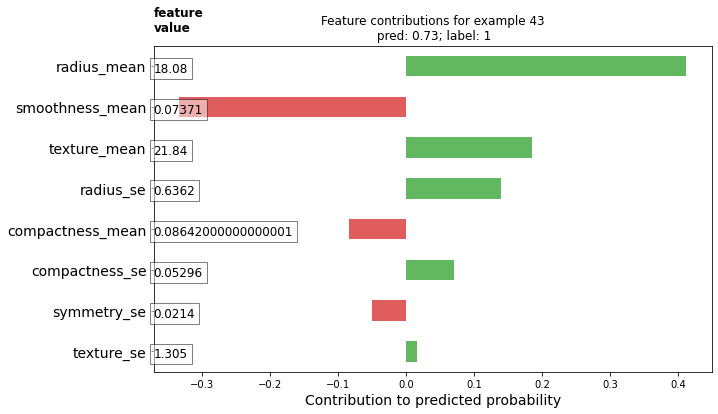

In [77]:
# Plot results.
ID = 43
example = df_dfc.iloc[ID]  # Choose ith example from evaluation set.
TOP_N = 8  # View top 8 features.
sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = plot_example(example)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'.format(ID, probs[ID], labels[ID]))
ax.set_xlabel('Contribution to predicted probability', size=14)
plt.show()

The larger magnitude contributions have a larger impact on the model's prediction. Negative contributions indicate the feature value for this given example reduced the model's prediction, while positive values contribute an increase in the prediction.

In [129]:
# Training again depending on the values 
data = cancer_dataset.drop(['id','diagnosis','smoothness_mean'],axis=1)
classes = cancer_dataset['diagnosis']
new_numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
print(new_numeric_cols)
print (data.shape)
print(classes.shape)

['radius_mean', 'texture_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se']
(569, 10)
(569,)


In [130]:
new_feature_columns = list()
fc = tf.feature_column

for numeric_cols in new_numeric_cols:
  new_feature_columns.append(fc.numeric_column(numeric_cols,dtype=tf.float32))
new_feature_columns

[NumericColumn(key='radius_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='texture_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='compactness_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='symmetry_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fractal_dimension_mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='radius_se', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='texture_se', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='smoothness_se', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='compactness_se', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='symmetry_se', 

In [132]:
# Use entire batch since this is such a small dataset.
x_train, x_test, y_train, y_test = train_test_split(data,classes,test_size=0.30)
print ("Trainnig data",x_train.shape)
print ("Train label",y_train.shape)
print ("Test data",x_test.shape)
print ("Test Label",y_test.shape)

Trainnig data (398, 10)
Train label (398,)
Test data (171, 10)
Test Label (171,)


In [133]:
NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = (dataset
      .repeat(n_epochs)
      .batch(NUM_EXAMPLES))
    return dataset
  return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(x_train, y_train)
eval_input_fn = make_input_fn(x_test, y_test, shuffle=False, n_epochs=1)

In [134]:
params = {
  'n_trees': 100,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

model = tf.estimator.BoostedTreesClassifier(new_feature_columns, **params)
print(model)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8mleq1sc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [135]:
# Train model.
model.train(train_input_fn, max_steps=100)

# Evaluation.
results = model.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

,0
accuracy,0.935673
accuracy_baseline,0.614035
auc,0.976984
auc_precision_recall,0.970897
average_loss,0.187113
label/mean,0.385965
loss,0.187113
precision,0.950820
prediction/mean,0.370276
recall,0.878788


In [149]:
save_path = '/content/breast_cancer_model/2'

In [151]:
# Saving estimator model
serving_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(
  tf.feature_column.make_parse_example_spec(new_feature_columns))
export_path = model.export_saved_model(save_path, serving_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: ['serving_default', 'classification']
INFO:tensorflow:Signatures INCLUDED in export for Regress: ['regression']
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:Restoring parameters from /tmp/tmp8mleq1sc/model.ckpt-100
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:SavedModel wr